### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
df_processed = pd.read_csv('../data/heart_disease_processed.csv')

X = df_processed.drop('target', axis=1)
y = df_processed['target']

In [4]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = model.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
     Feature  Importance
7    thalach    0.138306
9    oldpeak    0.122138
4       chol    0.116422
0        age    0.113967
11        ca    0.097398
3   trestbps    0.091751
12      thal    0.077441
2         cp    0.075563
8      exang    0.047884
10     slope    0.042916
1        sex    0.028483
6    restecg    0.027269
5        fbs    0.020461


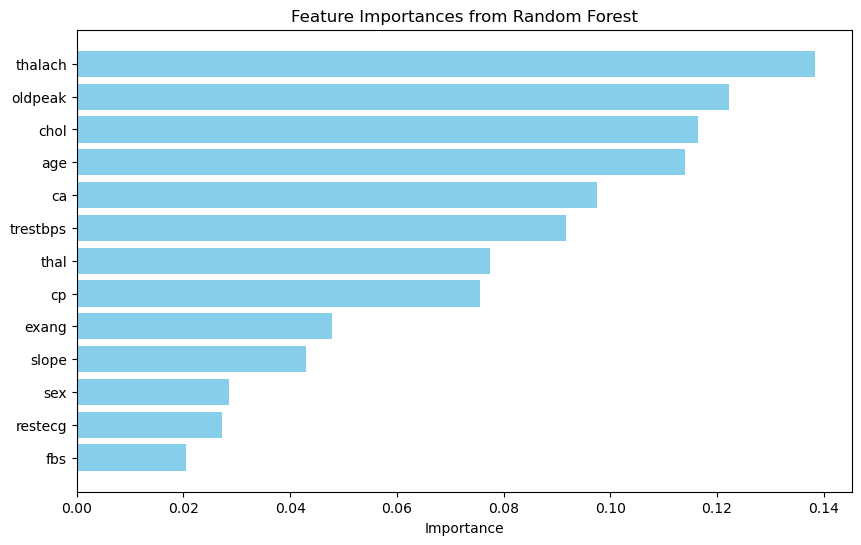

In [5]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [11]:
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(max_iter=1000, random_state=42)
selector = RFE(estimator, n_features_to_select=5)
selector.fit(X, y)

selected_features = X.columns[selector.support_]
print("Selected Features using RFE:")
print(selected_features)

Selected Features using RFE:
Index(['cp', 'restecg', 'oldpeak', 'ca', 'thal'], dtype='object')


In [7]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

In [9]:
chi2_scores, p_values = chi2(X_minmax, y)
chi2_df = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_scores, 'p-value': p_values})
chi2_df = chi2_df.sort_values(by='Chi2 Score', ascending=False)

print("Chi2 Scores:")
print(chi2_df)

Chi2 Scores:
     Feature  Chi2 Score       p-value
12      thal   48.176108  8.672776e-10
8      exang   41.534482  2.083076e-08
11        ca   36.622292  2.154659e-07
9    oldpeak   16.451213  2.469786e-03
10     slope   14.046618  7.147746e-03
2         cp    8.234094  8.336977e-02
1        sex    7.499223  1.117436e-01
6    restecg    7.028775  1.343754e-01
5        fbs    6.658223  1.550901e-01
7    thalach    3.133976  5.356604e-01
0        age    1.244886  8.706545e-01
3   trestbps    0.622014  9.605862e-01
4       chol    0.175931  9.963506e-01


In [10]:
significant_features = chi2_df[chi2_df['p-value'] < 0.05]
print("Significant Features (p-value < 0.05):")
print(significant_features)

Significant Features (p-value < 0.05):
    Feature  Chi2 Score       p-value
12     thal   48.176108  8.672776e-10
8     exang   41.534482  2.083076e-08
11       ca   36.622292  2.154659e-07
9   oldpeak   16.451213  2.469786e-03
10    slope   14.046618  7.147746e-03


In [12]:
final_features = list(set(selected_features) | set(significant_features['Feature']))

df_final = df_processed[final_features + ['target']]
df_final.to_csv('../data/heart_disease_RF.csv', index=False)